Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ε, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 75 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ε, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 78 seconds.


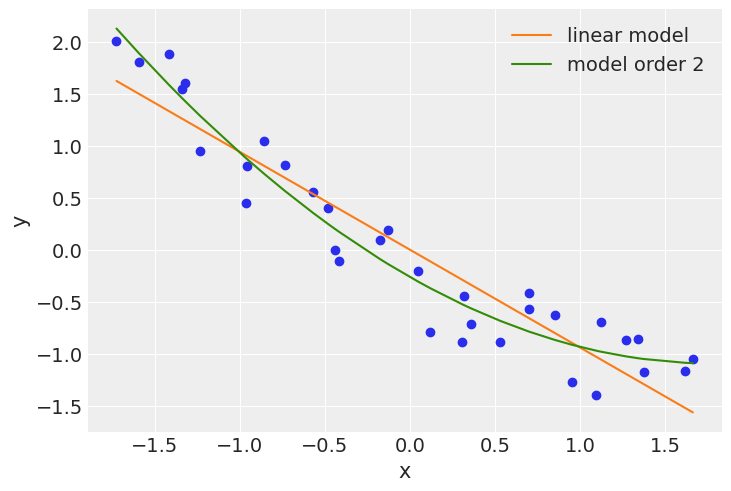

In [7]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
#import theano
#theano.config.blas__ldflags = ''
#COPIAT DIN CURS
az.style.use('arviz-darkgrid')
dummy_data = np.loadtxt('date.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]
order = 5
x_1p = np.vstack([x_1**i for i
in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))/x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_l:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=10)
    ε = pm.HalfNormal('ε', 5)
    μ = α + β * x_1s[0]
    y_pred = pm.Normal('y_pred', mu=μ, sd=ε, observed=y_1s)
    idata_l = pm.sample(2000, return_inferencedata=True)

with pm.Model() as model_p:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=10, shape=order)
    ε = pm.HalfNormal('ε', 5)
    μ = α + pm.math.dot(β, x_1s)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ε, observed=y_1s)
    idata_p = pm.sample(2000, return_inferencedata=True)

x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_l_post = idata_l.posterior['α'].mean(("chain", "draw")).values
β_l_post = idata_l.posterior['β'].mean(("chain", "draw")).values
y_l_post = α_l_post + β_l_post * x_new
plt.plot(x_new, y_l_post, 'C1', label='linear model')
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ε, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 81 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ε, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 202 seconds.
There were 678 divergences after tuning. Increase `target_accept` or reparameterize.
There were 222 divergences after tuning. Increase `target_accept` or reparameterize.
There were 515 divergences after tuning. Increase `target_accept` or reparameterize.
There were 538 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


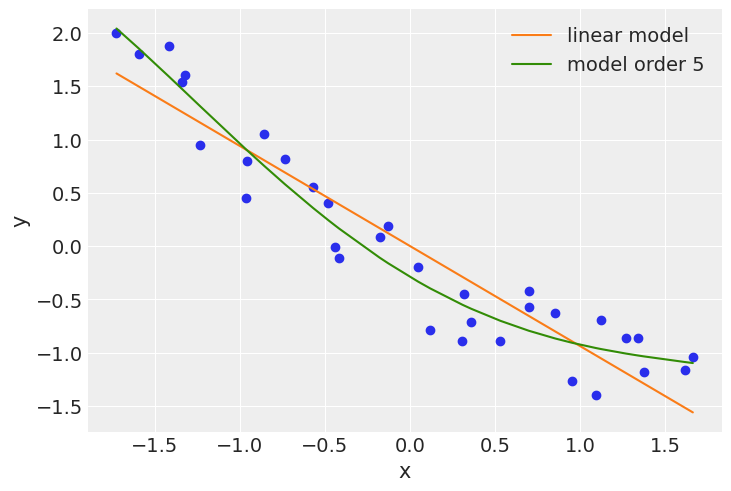

In [8]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
#import theano
#theano.config.blas__ldflags = ''
# EXERCITIUL 1A
az.style.use('arviz-darkgrid')
dummy_data = np.loadtxt('date.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]
order = 5
x_1p = np.vstack([x_1**i for i
in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))/x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_l:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=100)
    ε = pm.HalfNormal('ε', 5)
    μ = α + β * x_1s[0]
    y_pred = pm.Normal('y_pred', mu=μ, sd=ε, observed=y_1s)
    idata_l = pm.sample(2000, return_inferencedata=True)

with pm.Model() as model_p:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=10, shape=order)
    ε = pm.HalfNormal('ε', 5)
    μ = α + pm.math.dot(β, x_1s)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ε, observed=y_1s)
    idata_p = pm.sample(2000, return_inferencedata=True)

x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_l_post = idata_l.posterior['α'].mean(("chain", "draw")).values
β_l_post = idata_l.posterior['β'].mean(("chain", "draw")).values
y_l_post = α_l_post + β_l_post * x_new
plt.plot(x_new, y_l_post, 'C1', label='linear model')
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ε, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 26 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ε, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 124 seconds.
There were 26 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.881496485800497, but should be close to 0.8. Try to increase the number of tuning steps.
There were 163 divergences after tuning. Increase `target_accept` or reparameterize.
There were 412 divergences after tuning. Increase `target_accept` or reparameterize.
There were 256 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


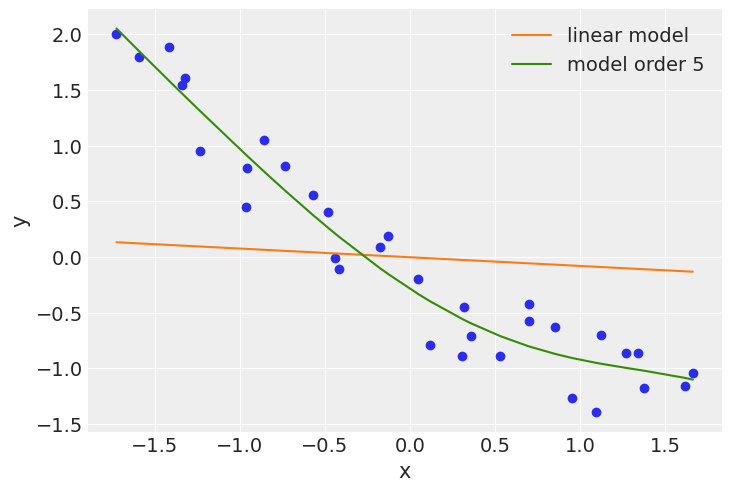

In [9]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
#import theano
#theano.config.blas__ldflags = ''
#EXERCITIUL 1B
az.style.use('arviz-darkgrid')
dummy_data = np.loadtxt('date.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]
order = 5
x_1p = np.vstack([x_1**i for i
in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))/x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_l:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=np.array([10, 0.1, 0.1, 0.1, 0.1]))
    ε = pm.HalfNormal('ε', 5)
    μ = α + β * x_1s[0]
    y_pred = pm.Normal('y_pred', mu=μ, sd=ε, observed=y_1s)
    idata_l = pm.sample(2000, return_inferencedata=True)

with pm.Model() as model_p:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=10, shape=order)
    ε = pm.HalfNormal('ε', 5)
    μ = α + pm.math.dot(β, x_1s)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ε, observed=y_1s)
    idata_p = pm.sample(2000, return_inferencedata=True)

x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_l_post = idata_l.posterior['α'].mean(("chain", "draw")).values
β_l_post = idata_l.posterior['β'].mean(("chain", "draw")).values
y_l_post = α_l_post + β_l_post * x_new
plt.plot(x_new, y_l_post, 'C1', label='linear model')
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ε, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 25 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ε, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 38 seconds.


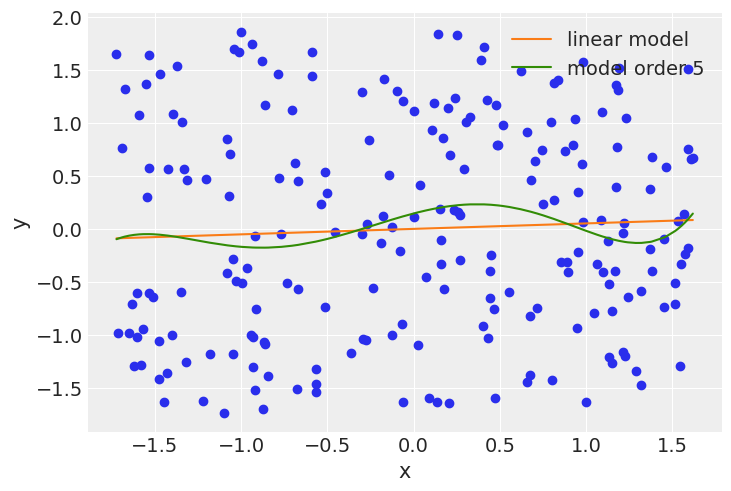

In [5]:
import pymc3 as pm
import numpy as np
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import csv
#import theano
#theano.config.blas__ldflags = ''
#EXERCITIUL 2 - cu sd=100

az.style.use('arviz-darkgrid')
x_1 = []
y_1 = []
file= open("my_date.csv","w")
for _ in range(500):
    # x_1.append(random.uniform(-10.0, 10.0))
    # y_1.append(random.uniform(-10.0, 10.0))
    file.write(f"{random.uniform(-10.0, 10.0)} ")
    file.write(f"{random.uniform(-10.0, 10.0)}")
    file.write("\n")
dummy_data = np.loadtxt('my_date.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]


order = 5
x_1p = np.vstack([x_1**i for i in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))/x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_l:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=100)
    ε = pm.HalfNormal('ε', 5)
    μ = α + β * x_1s[0]
    y_pred = pm.Normal('y_pred', mu=μ, sd=ε, observed=y_1s)
    idata_l = pm.sample(2000, return_inferencedata=True)

with pm.Model() as model_p:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=10, shape=order)
    ε = pm.HalfNormal('ε', 5)
    μ = α + pm.math.dot(β, x_1s)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ε, observed=y_1s)
    idata_p = pm.sample(2000, return_inferencedata=True)

x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_l_post = idata_l.posterior['α'].mean(("chain", "draw")).values
β_l_post = idata_l.posterior['β'].mean(("chain", "draw")).values
y_l_post = α_l_post + β_l_post * x_new
plt.plot(x_new, y_l_post, 'C1', label='linear model')
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

In [1]:
import pymc3 as pm
import numpy as np
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import csv
#import theano
#theano.config.blas__ldflags = ''
#EXERCITIUL 2 - cu sd=100

az.style.use('arviz-darkgrid')
x_1 = []
y_1 = []
file= open("my_date.csv","w")
for _ in range(500):
    # x_1.append(random.uniform(-10.0, 10.0))
    # y_1.append(random.uniform(-10.0, 10.0))
    file.write(f"{random.uniform(-10.0, 10.0)} ")
    file.write(f"{random.uniform(-10.0, 10.0)}")
    file.write("\n")
dummy_data = np.loadtxt('my_date.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]


order = 5
x_1p = np.vstack([x_1**i for i in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))/x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_l:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=np.array([10, 0.1, 0.1, 0.1, 0.1]))
    ε = pm.HalfNormal('ε', 5)
    μ = α + β * x_1s[0]
    y_pred = pm.Normal('y_pred', mu=μ, sd=ε, observed=y_1s)
    idata_l = pm.sample(2000, return_inferencedata=True)

with pm.Model() as model_p:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=10, shape=order)
    ε = pm.HalfNormal('ε', 5)
    μ = α + pm.math.dot(β, x_1s)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ε, observed=y_1s)
    idata_p = pm.sample(2000, return_inferencedata=True)

x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_l_post = idata_l.posterior['α'].mean(("chain", "draw")).values
β_l_post = idata_l.posterior['β'].mean(("chain", "draw")).values
y_l_post = α_l_post + β_l_post * x_new
plt.plot(x_new, y_l_post, 'C1', label='linear model')
α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


ValueError: Wrong number of columns at line 213

In [ ]:
with pm.Model() as model_c:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=100, shape=order)
    ε = pm.HalfNormal('ε', 5)
    μ = α + sum( [β*pow(x_1s[i]) for i in range(len(b))] )
    y_pred = pm.Normal('y_pred', mu=μ, sd=ε, observed=y_1s)
    idata_p = pm.sample(2000, return_inferencedata=True)